/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


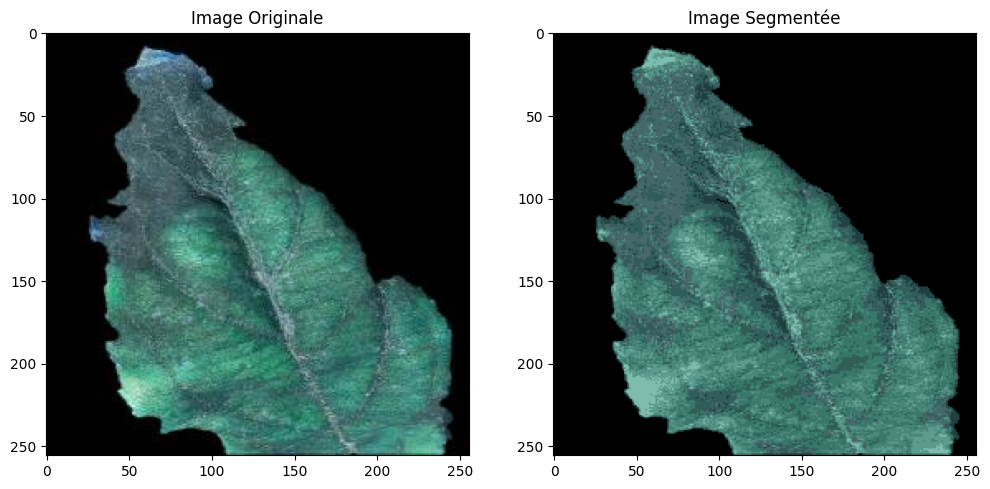

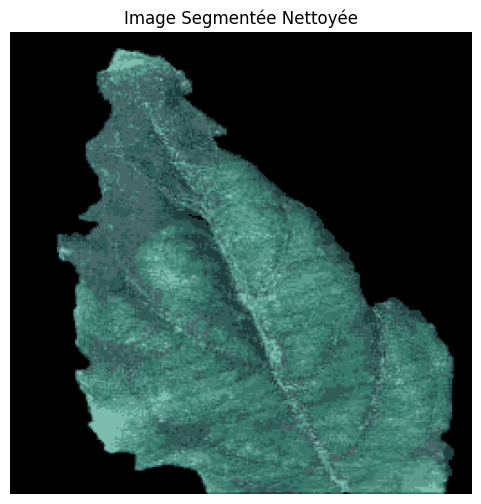

Nombre de pixels par couleur :
Couleur (48, 93, 88) : 6650 pixels
Couleur (71, 104, 105) : 5042 pixels
Couleur (32, 64, 63) : 1966 pixels
Couleur (126, 188, 173) : 1049 pixels
Couleur (74, 135, 123) : 7833 pixels
Couleur (91, 156, 142) : 4209 pixels
Couleur (55, 120, 106) : 7173 pixels


In [1]:
import cv2
import numpy as np
from collections import defaultdict
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('/kaggle/input/plantvillage-dataset/segmented/Apple___Apple_scab/0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037_final_masked.jpg')
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Redimensionner l'image si nécessaire
(h, w) = image.shape[:2]
image = cv2.resize(image, (w // 1, h // 1))

# Reshaper l'image en un vecteur de pixels
pixels = image.reshape((-1, 3))

# Appliquer K-means
k = 8  # nombre de clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Obtenir les labels et les couleurs des clusters
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Reshaper les labels en l'image segmentée
segmented_image = centers[labels].reshape(image.shape).astype(np.uint8)

# Afficher l'image originale et l'image segmentée
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image Originale')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Image Segmentée')
plt.imshow(segmented_image)
plt.show()

# Convertir l'image segmentée en niveaux de gris
gray = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

# Appliquer un seuillage pour obtenir une image binaire
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Définir le noyau pour les opérations morphologiques
kernel = np.ones((3, 3), np.uint8)

# Appliquer une ouverture (érosion suivie de dilatation)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Convertir l'image binaire nettoyée en une image segmentée couleur
cleaned_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=cleaned)

# Afficher l'image segmentée nettoyée
plt.figure(figsize=(6, 6))
plt.title('Image Segmentée Nettoyée')
plt.imshow(cleaned_segmented_image)
plt.axis('off')
plt.show()

# Initialiser un dictionnaire pour stocker les comptes de chaque couleur
color_counts = defaultdict(int)

# Parcourir chaque pixel et compter les couleurs
for row in cleaned_segmented_image:
    for pixel in row:
        color = tuple(pixel)  # Convertir le pixel en tuple (R, G, B)
        if color != (0, 0, 0):  # Ignorer les pixels noirs
            color_counts[color] += 1

# Afficher les résultats
print("Nombre de pixels par couleur :")
for color, count in color_counts.items():
    print(f"Couleur {color} : {count} pixels")